### Assignment 10

In [115]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

You will analyze one dataset about the outcomes for animals in animal centers of a city.<br>
Outcomes represent the status of animals as they leave the Animal Center. <br>
All animals receive a unique Animal ID during intake. <br>
The time recorded is the time when the outcome happens.

1. Import packages and the dataset

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

df = pd.read_csv('/content/Animal_Center.csv')
df.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Breed,Color
0,A882831,*Hamilton,7/1/2023 18:12,Jul-23,3/25/2023,Adoption,NaN,Cat,Neutered Male,Domestic Shorthair Mix,Black/White
1,A794011,Chunk,5/8/2019 18:20,May-19,5/2/2017,Rto-Adopt,NaN,Cat,Neutered Male,Domestic Shorthair Mix,Brown Tabby/White
2,A776359,Gizmo,7/18/2018 16:02,Jul-18,7/12/2017,Adoption,NaN,Dog,Neutered Male,Chihuahua Shorthair Mix,White/Brown
3,A821648,NaN,8/16/2020 11:38,Aug-20,8/16/2019,Euthanasia,NaN,Other,Unknown,Raccoon,Gray
4,A720371,Moose,2/13/2016 17:59,Feb-16,10/8/2015,Adoption,NaN,Dog,Neutered Male,Anatol Shepherd/Labrador Retriever,Buff


2. Check for basic information. What data types are the variables? Any missing values? What will you suggest to do with the ones with a lot of missing values?

In [117]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169306 entries, 0 to 169305
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         169306 non-null  object
 1   Name              120729 non-null  object
 2   DateTime          169306 non-null  object
 3   MonthYear         169306 non-null  object
 4   Date of Birth     169306 non-null  object
 5   Outcome Type      169261 non-null  object
 6   Outcome Subtype   77707 non-null   object
 7   Animal Type       169306 non-null  object
 8   Sex upon Outcome  169303 non-null  object
 9   Breed             169306 non-null  object
 10  Color             169306 non-null  object
dtypes: object(11)
memory usage: 14.2+ MB


,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Breed,Color
count,169306,120729,169306,169306,169306,169261,77707,169306,169303,169306,169306
unique,152166,29193,141333,135,8537,11,26,5,5,2978,657
top,A721033,Luna,4/18/2016 0:00,Jun-19,5/1/2016,Adoption,Partner,Dog,Neutered Male,Domestic Shorthair Mix,Black/White
freq,33,735,39,2244,121,81806,39636,92296,59309,34003,17546


For columns with a lot of missing values:
1. If a column has a very high percentage of missing values and isn't crucial, delete it.
2. Replace missing values with a reasonable estimate.  Strategies include:
- Mean/Median/Mode imputation (for numerical data)
- Frequent category imputation (for categorical data)
- K-Nearest Neighbors imputation
- More advanced methods like multiple imputation.

3. Prepare the target variable 'Outcome Type'. How many unique types? How many observations for each type? Make a graph to examine the distribution.

there are 11 unique types


,count
Outcome Type,
Adoption,81806
Transfer,47760
Return to Owner,25332
Euthanasia,10562
Died,1623
Rto-Adopt,1205
Disposal,848
Missing,90
Relocate,27


<Axes: xlabel='Outcome Type'>

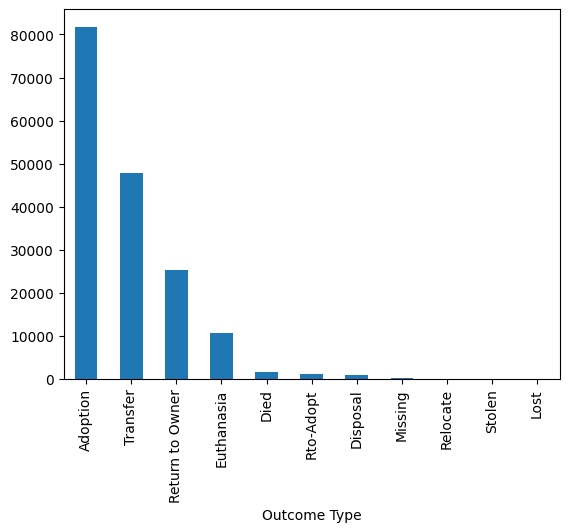

In [118]:
print(f'there are {df["Outcome Type"].nunique()} unique types')
df['Outcome Type'].value_counts()
df['Outcome Type'].value_counts().plot(kind='bar')

# adoption count is high for outcome type.

What is the percentage of each type?

In [119]:
outcome_percentages = df['Outcome Type'].value_counts(normalize=True) * 100
outcome_percentages


,proportion
Outcome Type,
Adoption,48.331275
Transfer,28.216778
Return to Owner,14.966236
Euthanasia,6.240067
Died,0.958874
Rto-Adopt,0.711918
Disposal,0.501001
Missing,0.053172
Relocate,0.015952


We would like to reduce the number of categories by combining rare categories into one 'Others' category. We keep the top 4 and combine others. After combining, the variable should have five categories: Adoption, Transfer, Return to Owner, Euthanasia and Others. You may create a new variale 'Outcome' to hold the new categories.

In [120]:
df['Other'] = df['Outcome Type'].apply(lambda x: 'Others' if x not in ['Adoption', 'Transfer', 'Return_to_owner', 'Euthanasia'] else x)
df['Other'].value_counts()

,count
Other,
Adoption,81806
Transfer,47760
Others,29178
Euthanasia,10562


4. Create a variable 'Age' for the animals. Measure it in months (no need to consider days).

In [121]:
df['DateTime'] = pd.to_datetime(df['DateTime'])
df['Date of Birth'] = pd.to_datetime(df['Date of Birth'])

df['Age'] = (df['DateTime'] - df['Date of Birth']) / pd.Timedelta(days=30)
df['Age'] = df['Age'].astype(int)

df.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Breed,Color,Other,Age
0,A882831,*Hamilton,2023-07-01 18:12:00,Jul-23,2023-03-25,Adoption,NaN,Cat,Neutered Male,Domestic Shorthair Mix,Black/White,Adoption,3
1,A794011,Chunk,2019-05-08 18:20:00,May-19,2017-05-02,Rto-Adopt,NaN,Cat,Neutered Male,Domestic Shorthair Mix,Brown Tabby/White,Others,24
2,A776359,Gizmo,2018-07-18 16:02:00,Jul-18,2017-07-12,Adoption,NaN,Dog,Neutered Male,Chihuahua Shorthair Mix,White/Brown,Adoption,12
3,A821648,NaN,2020-08-16 11:38:00,Aug-20,2019-08-16,Euthanasia,NaN,Other,Unknown,Raccoon,Gray,Euthanasia,12
4,A720371,Moose,2016-02-13 17:59:00,Feb-16,2015-10-08,Adoption,NaN,Dog,Neutered Male,Anatol Shepherd/Labrador Retriever,Buff,Adoption,4


Check the distribution statistics of Age variable. What abnormal values do you find?

,Age
count,169306.000000
mean,25.027347
std,34.834780
min,-51.000000
25%,2.000000
50%,12.000000
75%,27.000000
max,366.000000


<Axes: >

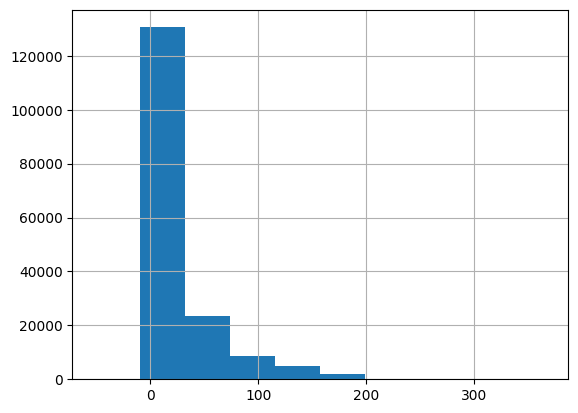

In [122]:
df['Age'].describe()
df['Age'].hist()

Take a look at those observations with abnormal values (slicing the observations). How many of them?

In [123]:
abnormal_ages = df[(df['Age'] < 0) | (df['Age'] > 240)]
num_abnormal_ages = len(abnormal_ages)
print(f"Number of observations with abnormal ages: {num_abnormal_ages}")
abnormal_ages.head()

Number of observations with abnormal ages: 63


,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Breed,Color,Other,Age
815,A788866,NaN,2019-02-15 12:02:00,Feb-19,2019-12-06,Adoption,NaN,Dog,Neutered Male,German Shepherd/Catahoula,Black Brindle,Adoption,-9
5914,A261770,Halo,2014-11-07 15:51:00,Nov-14,1994-11-07,Euthanasia,Suffering,Cat,Neutered Male,Domestic Shorthair Mix,White,Euthanasia,243
10790,A682010,Babyblueeyes,2014-06-25 13:26:00,Jun-14,1992-06-25,Return to Owner,NaN,Cat,Neutered Male,Domestic Shorthair Mix,Seal Point,Others,267
11804,A757376,Gorda,2017-09-05 19:25:00,Sep-17,2019-11-05,Rto-Adopt,NaN,Dog,Spayed Female,Miniature Schnauzer Mix,White,Others,-26
12930,A855081,Rasheedi,2022-04-14 10:53:00,Apr-22,1994-04-14,Return to Owner,NaN,Other,Intact Female,Tortoise,Brown,Others,340


We decide to filter out the abnormal values.

In [124]:
df = df[(df['Age'] >= 0) & (df['Age'] <= 240)]

print(f"Number of observations after filtering abnormal ages: {len(df)}")

Number of observations after filtering abnormal ages: 169243


Make a graph to check the distribution of Age. What do you observe?

,Age
count,169243.000000
mean,24.977435
std,34.651169
min,0.000000
25%,2.000000
50%,12.000000
75%,27.000000
max,240.000000


<Axes: >

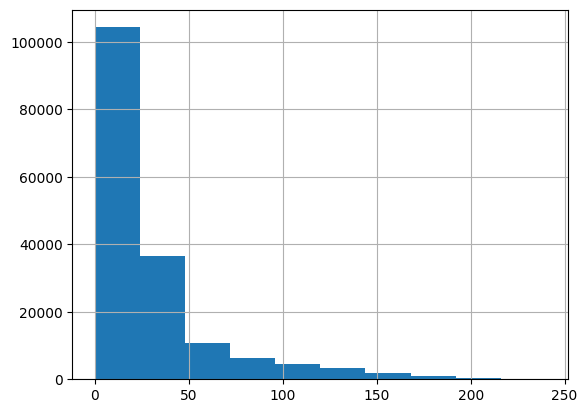

In [125]:
df['Age'].describe()
df['Age'].hist()

To adjust the variable, we create a new variable that takes log of Age.

In [126]:
# To adjust the variable, we create a new variable that takes log of Age.
df['Log_Age'] = np.log1p(df['Age'])

Check the distribution of the new log variable. What do you find?

,Age
count,169243.000000
mean,24.977435
std,34.651169
min,0.000000
25%,2.000000
50%,12.000000
75%,27.000000
max,240.000000


,Log_Age
count,169243.000000
mean,2.460191
std,1.335478
min,0.000000
25%,1.098612
50%,2.564949
75%,3.332205
max,5.484797


<Axes: >

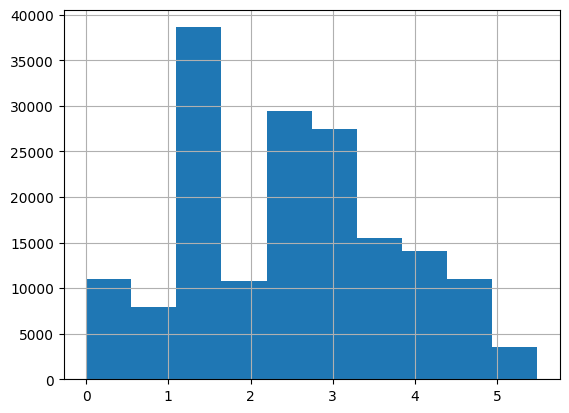

In [127]:
df['Age'].describe()
df['Log_Age'].describe()
df['Log_Age'].hist()

# It is not a normal distribution.
# most of the age lies between 1-2.

5. Make a graph to show the numbers of animals in animal centers change over years. What do you observe for year 2020? Can you explain?

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Number of Animals')

Text(0.5, 1.0, 'Number of Animals in Animal Centers Over Time')

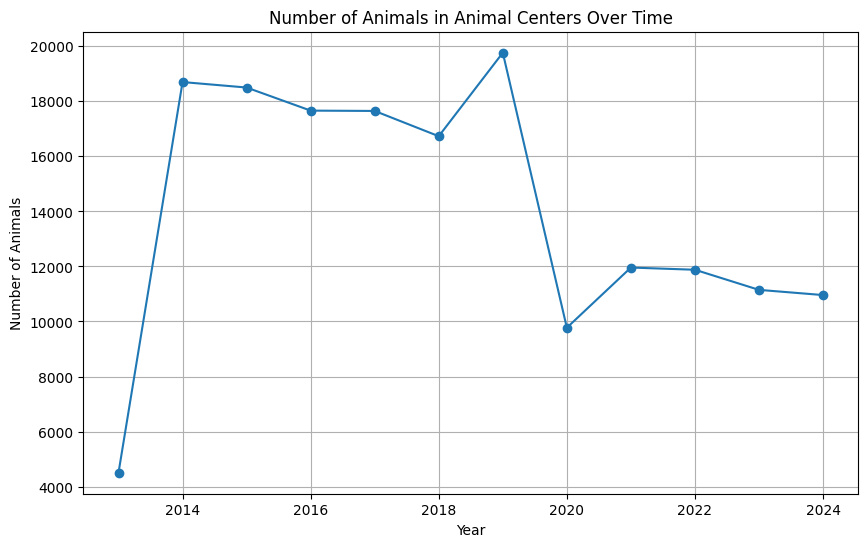

Number of animals in 2020: 9773
The number of animals in 2020 appears to be lower than in previous years. This might be due to decrease in pet abandonment due to the Covid-19.


In [128]:
animals_per_year = df.groupby(df['DateTime'].dt.year)['Animal ID'].count()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(animals_per_year.index, animals_per_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Animals')
plt.title('Number of Animals in Animal Centers Over Time')
plt.grid(True)
plt.show()

# Observation for 2020
year_2020_animals = animals_per_year.get(2020, None)

print(f"Number of animals in 2020: {year_2020_animals}")
print(f"The number of animals in 2020 appears to be lower than in previous years. This might be due to decrease in pet abandonment due to the Covid-19.")

6. For variable 'Animal Type'. How many unique values? How many observations for each type?

There are 5 unique types


,count
Animal Type,
Dog,92272
Cat,67335
Other,8751
Bird,851
Livestock,34


<Axes: xlabel='Animal Type'>

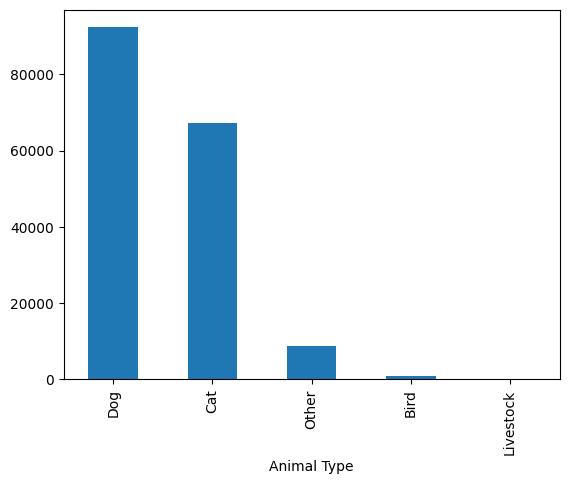

In [129]:
print(f'There are {df["Animal Type"].nunique()} unique types')
df['Animal Type'].value_counts()
df['Animal Type'].value_counts().plot(kind='bar')

For variable 'Sex upon Outcome'. How many unique values? How many observations for each type?

There are 5 unique types


,count
Sex upon Outcome,
Neutered Male,59288
Spayed Female,53731
Intact Male,21780
Intact Female,21317
Unknown,13124


<Axes: xlabel='Sex upon Outcome'>

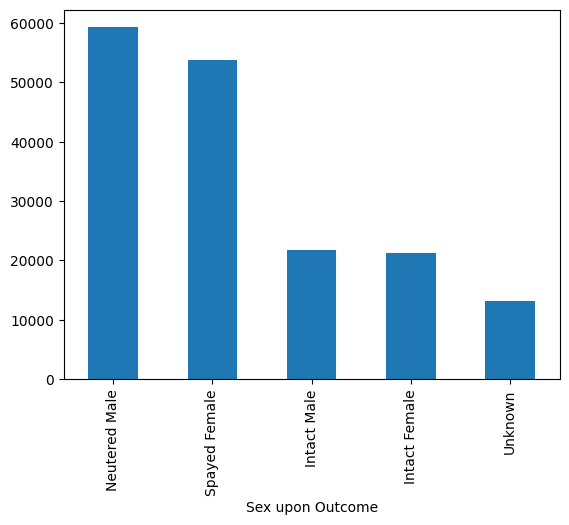

In [130]:
print(f'There are {df["Sex upon Outcome"].nunique()} unique types')
df['Sex upon Outcome'].value_counts()
df['Sex upon Outcome'].value_counts().plot(kind='bar')

Make a pivot table of the two categories. Count the observations for each combination. Which animal type has the most Unknown sex?

In [131]:
pivot_table = pd.pivot_table(df, values='Animal ID', index='Animal Type', columns='Sex upon Outcome', aggfunc='count', fill_value=0)
print(pivot_table)
max_unknown_sex = pivot_table['Unknown'].idxmax()
print(f"\nAnimal type with the most 'Unknown' sex: {max_unknown_sex}")

Sex upon Outcome  Intact Female  Intact Male  Neutered Male  Spayed Female  \
Animal Type                                                                  
Bird                        134          227              0              0   
Cat                       10591         9672          21216          21021   
Dog                        9968        11184          37860          32553   
Livestock                     9            8              1              0   
Other                       615          689            211            157   

Sex upon Outcome  Unknown  
Animal Type                
Bird                  490  
Cat                  4835  
Dog                   704  
Livestock              16  
Other                7079  

Animal type with the most 'Unknown' sex: Other


Given the information above, we decide to consider only the cases of cats and dogs. Filter the dataset to keep only Cat and Dog categories.

In [132]:
df_new = df[df['Animal Type'].isin(['Cat', 'Dog'])]
print(f"Number of observations after filtering for cats and dogs: {len(df_new)}")

Number of observations after filtering for cats and dogs: 159607


6. Now we continue the work with our cat and dog dataset. Prepare variable 'Breed'. How many unique values? How many observations in each category?

In [133]:
print(f'There are {df_new["Breed"].nunique()} unique breeds')
df_new['Breed'].value_counts()

There are 2738 unique breeds


,count
Breed,
Domestic Shorthair Mix,33988
Domestic Shorthair,22101
Pit Bull Mix,10026
Labrador Retriever Mix,8592
Chihuahua Shorthair Mix,6879
...,...
Dachshund Wirehair/Bruss Griffon,1
Lhasa Apso/Standard Poodle,1
Catahoula/Queensland Heeler,1


Examine the breeds. For simplicity, we combine the categories with the same first word. For instance, 'Angora Mix', 'Angora-English', 'Angora/Persian' should all be combined to 'Angora'. Note: the first word is splitted either by space or '/'. How many categories after combination?

In [134]:
def combine_breeds(breed):
    parts = breed.split(maxsplit=1)
    if '/' in parts[0]:
      parts = parts[0].split('/', maxsplit=1)
    return parts[0]

df_new['Combined_Breed'] = df_new['Breed'].apply(combine_breeds)
print(f'There are {df_new["Combined_Breed"].nunique()} unique breeds after combination')
df_new['Combined_Breed'].value_counts()
df_new.head()

There are 194 unique breeds after combination


<ipython-input-134-94dcaa0e1f68>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Combined_Breed'] = df_new['Breed'].apply(combine_breeds)


,count
Combined_Breed,
Domestic,63889
Pit,14157
Labrador,13144
Chihuahua,10807
German,6986
...,...
Ocicat,1
Grand,1
Sealyham,1


,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Breed,Color,Other,Age,Log_Age,Combined_Breed
0,A882831,*Hamilton,2023-07-01 18:12:00,Jul-23,2023-03-25,Adoption,NaN,Cat,Neutered Male,Domestic Shorthair Mix,Black/White,Adoption,3,1.386294,Domestic
1,A794011,Chunk,2019-05-08 18:20:00,May-19,2017-05-02,Rto-Adopt,NaN,Cat,Neutered Male,Domestic Shorthair Mix,Brown Tabby/White,Others,24,3.218876,Domestic
2,A776359,Gizmo,2018-07-18 16:02:00,Jul-18,2017-07-12,Adoption,NaN,Dog,Neutered Male,Chihuahua Shorthair Mix,White/Brown,Adoption,12,2.564949,Chihuahua
4,A720371,Moose,2016-02-13 17:59:00,Feb-16,2015-10-08,Adoption,NaN,Dog,Neutered Male,Anatol Shepherd/Labrador Retriever,Buff,Adoption,4,1.609438,Anatol
5,A674754,NaN,2014-03-18 11:47:00,Mar-14,2014-03-12,Transfer,Partner,Cat,Intact Male,Domestic Shorthair Mix,Orange Tabby,Transfer,0,0.000000,Domestic


There are still a lot of categories. We decide to combine the categories that have fewer than 300 observations to 'Others'. This should significantly reduce the number of categories.

In [135]:
breed_counts = df_new['Combined_Breed'].value_counts()

other_breeds = breed_counts[breed_counts < 300].index.tolist()

df_new['Breed_Final'] = df_new['Combined_Breed'].apply(lambda x: 'Others' if x in other_breeds else x)

print(f'There are {df_new["Breed_Final"].nunique()} unique breeds')


There are 40 unique breeds


<ipython-input-135-534c236f0106>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Breed_Final'] = df_new['Combined_Breed'].apply(lambda x: 'Others' if x in other_breeds else x)


7. We will do the similar for the variable 'color'. For simplicity, we combine the categories with the same first word. Note: the first word is splitted either by space or '/'.

In [136]:
def combine_colors(color):
    parts = color.split(maxsplit=1)
    if '/' in parts[0]:
        parts = parts[0].split('/', maxsplit=1)
    return parts[0]

df_new['Combined_Color'] = df_new['Color'].apply(combine_colors)
print(f'There are {df_new["Combined_Color"].nunique()} unique colors after combination')
df_new['Combined_Color'].value_counts()

<ipython-input-136-a150a21d2def>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Combined_Color'] = df_new['Color'].apply(combine_colors)


There are 30 unique colors after combination


,count
Combined_Color,
Black,40314
Brown,33496
White,20555
Blue,13370
Tan,10977
Orange,7931
Red,4104
Tricolor,3853
Tortie,3533


There are still a lot of categories. We keep the Top 10 categories and combine the rest to one 'Other' category.

In [137]:
color_counts = df_new['Combined_Color'].value_counts()
top_10_colors = color_counts.nlargest(10).index.tolist()

df_new['Color_Final'] = df_new['Combined_Color'].apply(lambda x: 'Other' if x not in top_10_colors else x)

print(f'There are {df_new["Color_Final"].nunique()} unique colors')

There are 11 unique colors


<ipython-input-137-8fa048d0495f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Color_Final'] = df_new['Combined_Color'].apply(lambda x: 'Other' if x not in top_10_colors else x)


8. Now we are ready to classify the outcomes for animals.

In [138]:
df = df_new.copy()
df.head()
df.describe()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Breed,Color,Other,Age,Log_Age,Combined_Breed,Breed_Final,Combined_Color,Color_Final
0,A882831,*Hamilton,2023-07-01 18:12:00,Jul-23,2023-03-25,Adoption,NaN,Cat,Neutered Male,Domestic Shorthair Mix,Black/White,Adoption,3,1.386294,Domestic,Domestic,Black,Black
1,A794011,Chunk,2019-05-08 18:20:00,May-19,2017-05-02,Rto-Adopt,NaN,Cat,Neutered Male,Domestic Shorthair Mix,Brown Tabby/White,Others,24,3.218876,Domestic,Domestic,Brown,Brown
2,A776359,Gizmo,2018-07-18 16:02:00,Jul-18,2017-07-12,Adoption,NaN,Dog,Neutered Male,Chihuahua Shorthair Mix,White/Brown,Adoption,12,2.564949,Chihuahua,Chihuahua,White,White
4,A720371,Moose,2016-02-13 17:59:00,Feb-16,2015-10-08,Adoption,NaN,Dog,Neutered Male,Anatol Shepherd/Labrador Retriever,Buff,Adoption,4,1.609438,Anatol,Anatol,Buff,Other
5,A674754,NaN,2014-03-18 11:47:00,Mar-14,2014-03-12,Transfer,Partner,Cat,Intact Male,Domestic Shorthair Mix,Orange Tabby,Transfer,0,0.000000,Domestic,Domestic,Orange,Orange


,DateTime,Date of Birth,Age,Log_Age
count,159607,159607,159607.000000,159607.000000
mean,2018-10-02 08:31:59.478218496,2016-08-14 05:13:35.535659264,25.502791,2.453475
min,2013-10-01 09:31:00,1994-03-01 00:00:00,0.000000,0.000000
25%,2016-01-12 19:03:30,2014-01-30 00:00:00,2.000000,1.098612
50%,2018-06-30 13:57:00,2016-09-11 00:00:00,12.000000,2.564949
75%,2021-06-10 16:31:00,2019-09-07 00:00:00,29.000000,3.401197
max,2024-12-04 09:32:00,2024-11-15 00:00:00,240.000000,5.484797
std,NaN,NaN,35.473754,1.358535


First, let's create a new dataset by selecting the variables we will use in the model: 'Outcome', 'Sex upone Outcome', 'Breed combined' (after combination), 'color combined' (after combination), 'logAge'.

In [139]:
df = df[['Outcome Type', 'Sex upon Outcome', 'Breed_Final', 'Color_Final', 'Log_Age']]
df.head()

,Outcome Type,Sex upon Outcome,Breed_Final,Color_Final,Log_Age
0,Adoption,Neutered Male,Domestic,Black,1.386294
1,Rto-Adopt,Neutered Male,Domestic,Brown,3.218876
2,Adoption,Neutered Male,Chihuahua,White,2.564949
4,Adoption,Neutered Male,Anatol,Other,1.609438
5,Transfer,Intact Male,Domestic,Orange,0.000000


Delete missing values (since there are very few of them).

In [140]:
df = df.dropna()
df.head()

,Outcome Type,Sex upon Outcome,Breed_Final,Color_Final,Log_Age
0,Adoption,Neutered Male,Domestic,Black,1.386294
1,Rto-Adopt,Neutered Male,Domestic,Brown,3.218876
2,Adoption,Neutered Male,Chihuahua,White,2.564949
4,Adoption,Neutered Male,Anatol,Other,1.609438
5,Transfer,Intact Male,Domestic,Orange,0.000000


Prepare X and y (Outome)

In [141]:
X = df.drop('Outcome Type', axis=1)
y = df['Outcome Type']

Code the categorical variables in X into dummy variables.

In [142]:
X = pd.get_dummies(X).astype('int')
X.head()

,Log_Age,Sex upon Outcome_Intact Female,Sex upon Outcome_Intact Male,Sex upon Outcome_Neutered Male,Sex upon Outcome_Spayed Female,Sex upon Outcome_Unknown,Breed_Final_Alaskan,Breed_Final_American,Breed_Final_Anatol,Breed_Final_Australian,...,Color_Final_Blue,Color_Final_Brown,Color_Final_Cream,Color_Final_Orange,Color_Final_Other,Color_Final_Red,Color_Final_Tan,Color_Final_Tortie,Color_Final_Tricolor,Color_Final_White
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


Split training and testing datasets.

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Run a classification model of your choice.

In [146]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_rf))

RandomForestClassifier(random_state=42)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                 precision    recall  f1-score   support

       Adoption       0.72      0.92      0.81     16106
           Died       0.23      0.01      0.02       262
       Disposal       0.00      0.00      0.00        54
     Euthanasia       0.25      0.02      0.04       922
        Missing       0.00      0.00      0.00        14
       Relocate       0.00      0.00      0.00         2
Return to Owner       0.46      0.32      0.38      4951
      Rto-Adopt       0.25      0.00      0.01       249
         Stolen       0.00      0.00      0.00         1
       Transfer       0.74      0.61      0.67      9353

       accuracy                           0.69     31914
      macro avg       0.26      0.19      0.19     31914
   weighted avg       0.66      0.69      0.66     31914



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Calculate the accuracy rate.

In [147]:
accuracy_score(y_test, y_pred_rf)

0.6943661089177163